# HW3 : predict the stock movement
## dataset
   [2009/1~2019/1](https://www.sharecast.com/index/SP_500/prices/download)


In [153]:
import pandas as pd

path = './download.csv'
pd_data = pd.read_csv(path)
pd_data.head()

import warnings
warnings.filterwarnings("ignore")


## Preprocessing
### create the column of stock movement
    和前一天比，increase:1, decrease:0

In [154]:
pd_data['movement'] = 0

for i in range(0, 2515):
    if(pd_data['Close Price'][i] < pd_data['Close Price'][i+1]):
        pd_data['movement'][i] = 1
    
pd_data.head()


,Date,Open Price,Close Price,High Price,Low Price,Volume,movement
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


### split train set and test set
    Attribute：Open Price（開盤價）、Close Price（收盤價）、High Price（當日最高價）、Low Price（當日最低價）、Volume（當日成交量）
    前2264筆資料當作train set，2009~2017年
    剩餘252筆資料當作test set，2018年
    

In [155]:
train = pd_data[:2264]
test = pd_data[2264:]

#train set x
xtr = train[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
#train set y
ytr = train[['movement']]
#test set x 
xte = test[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
#test set y
yte = test[['movement']]

print(xtr.head())
print(ytr.head())

   Open Price  Close Price  High Price  Low Price      Volume
0      902.99       931.80      934.73     899.35  4048270080
1      929.17       927.45      936.63     919.53  5413910016
2      931.17       934.70      943.85     927.28  5392620032
3      927.45       906.65      927.45     902.37  4704940032
4      905.73       909.73      910.00     896.81  4991549952
   movement
0         0
1         1
2         0
3         1
4         0


### standardization

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtr)
xtr_std = scaler.transform(xtr)
xte_std = scaler.transform(xte)

print(xtr_std)

[[-1.55230001 -1.49441197 -1.50545617 -1.54093327  0.81362581]
 [-1.49834121 -1.50337884 -1.50153623 -1.49936521  1.82418053]
 [-1.49421907 -1.48843406 -1.48664047 -1.48340126  1.80842623]
 ...
 [ 2.1145693   2.11464105  2.10688987  2.1247189  -1.33171387]
 [ 2.12281357  2.12478289  2.11105738  2.13250518 -1.34874724]
 [ 2.12909984  2.09606828  2.12025892  2.11380162 -1.19609981]]


## 1.Logistic Regression

### 用預設的參數
    準確率不太好，只有0.52

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(xtr_std, ytr)

result = LR.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)
print(result)

0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


### 把volume拿掉試試看
    準確率不變，作用不大

In [158]:
tr_std = xtr_std[:, 0:4]
te_std = xte_std[:, 0:4]

LR.fit(tr_std, ytr)
result = LR.predict(te_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)

0.5198412698412699


## 2.SVM
### 用預設的參數，發現準確率偏低
    default: penalty = 1, kernel = rbf
    準確率仍為0.52

In [159]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(xtr_std, ytr)

result = svm.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)
print(result)

0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 換個kernel試試看
    當kernel = linear，準確律還是不變
    accuracy: 0.52

In [160]:
svm = SVC(kernel = 'linear')
svm.fit(xtr_std, ytr)

result = svm.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)
print(result)

0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 調高penalty
    測試過後，最佳的penalty是9
    準確值意外的來到0.61

In [161]:
svm = SVC(C = 9)
svm.fit(xtr_std, ytr)

result = svm.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)
print(result)

0.6111111111111112
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 再換個kernel

In [162]:
svm = SVC(C = 9, kernel = 'linear')
svm.fit(xtr_std, ytr)

result = svm.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print(acc_rate)
print(result)

0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Neural Network


In [163]:
from keras import models, layers, optimizers, regularizers

hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.1
epochs = 20
batch_size = 100

In [164]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 5, units = hidden_units, activation=activation))

#output layer
model.add(layers.Dense(input_dim = hidden_units, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

### y加上權重

In [165]:
n = ytr['movement'].value_counts()
print("0's : %d" % n[0])
print("1's : %d" % n[1])
class_weight = {
    0: 1.,
    1: n[1] / n[0]
}


0's : 1027
1's : 1237


### 1 hidden layer, 10 units
* 準確率只有0.52，再試試其他參數

Epoch 1/20
2264/2264 [==============================] - 2s 910us/step - loss: 0.7892 - acc: 0.5406
Epoch 2/20
2264/2264 [==============================] - 0s 37us/step - loss: 0.7668 - acc: 0.5371
Epoch 3/20
2264/2264 [==============================] - 0s 43us/step - loss: 0.7572 - acc: 0.5451
Epoch 4/20
2264/2264 [==============================] - 0s 43us/step - loss: 0.7563 - acc: 0.5455
Epoch 5/20
2264/2264 [==============================] - 0s 46us/step - loss: 0.7529 - acc: 0.5464
Epoch 6/20
2264/2264 [==============================] - 0s 49us/step - loss: 0.7514 - acc: 0.5415
Epoch 7/20
2264/2264 [==============================] - 0s 65us/step - loss: 0.7533 - acc: 0.5464
Epoch 8/20
2264/2264 [==============================] - 0s 44us/step - loss: 0.7563 - acc: 0.5442
Epoch 9/20
2264/2264 [==============================] - 0s 64us/step - loss: 0.7524 - acc: 0.5464
Epoch 10/20
2264/2264 [==============================] - 0s 50us/step - loss: 0.7521 - acc: 0.5464
Epoch 11/20
2264/2

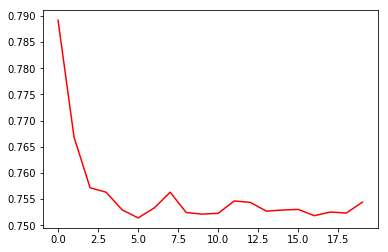

In [166]:
import matplotlib.pyplot as plt
# train
history = model.fit(xtr_std, ytr, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(xtr_std, ytr, batch_size=32)[1]
test_acc = model.evaluate(xte_std, yte, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### 2 hidden layers
* 準確率還是0.52

In [167]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 5, units = hidden_units, activation=activation))

#hidden layer2
model.add(layers.Dense(input_dim = hidden_units, units = hidden_units*2, activation=activation))

#output layer
model.add(layers.Dense(input_dim = hidden_units*2, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/20
2264/2264 [==============================] - 2s 979us/step - loss: 0.7669 - acc: 0.5451
Epoch 2/20
2264/2264 [==============================] - 0s 51us/step - loss: 0.7536 - acc: 0.5464
Epoch 3/20
2264/2264 [==============================] - 0s 45us/step - loss: 0.7526 - acc: 0.5464
Epoch 4/20
2264/2264 [==============================] - 0s 76us/step - loss: 0.7525 - acc: 0.5464
Epoch 5/20
2264/2264 [==============================] - 0s 68us/step - loss: 0.7530 - acc: 0.5464
Epoch 6/20
2264/2264 [==============================] - 0s 70us/step - loss: 0.7541 - acc: 0.5464
Epoch 7/20
2264/2264 [==============================] - 0s 74us/step - loss: 0.7521 - acc: 0.5464
Epoch 8/20
2264/2264 [==============================] - 0s 60us/step - loss: 0.7527 - acc: 0.5464
Epoch 9/20
2264/2264 [==============================] - 0s 59us/step - loss: 0.7525 - acc: 0.5464
Epoch 10/20
2264/2264 [==============================] - 0s 71us/step - loss: 0.7545 - acc: 0.5464
Epoch 11/20
2264/2

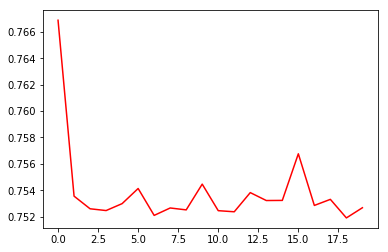

In [168]:
# train
history = model.fit(xtr_std, ytr, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(xtr_std, ytr, batch_size=32)[1]
test_acc = model.evaluate(xte_std, yte, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### 討論
* dataset提供的資訊量太少，建出的model不夠好
* 三種model預測的準確率都偏低，最高的只有SVM跑出的61.2％，可見此數據沒有太多規律可尋
* 股票市場漲跌變數太多，難以預測
* 若用電腦運算就能準確預測股票市場，那豈不是大家都發大財了XD

## Another dataset: iris data set

In [169]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.data[:5])
print(iris.target_names)
print(iris.target[:5])
#iris['data']
#iris['target']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


### Preprocessing

In [194]:
#split train set and test set
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(iris['data'], iris['target'])

#standardlization
scaler.fit(xtr)
xtr_std = scaler.transform(xtr)
xte_std = scaler.transform(xte)

print(xtr_std[:5])

[[-0.2630048  -0.83381911  0.23218166  0.09625595]
 [ 2.23129879 -1.06964674  1.72923356  1.36456966]
 [-1.45076842  0.1094914  -1.26487024 -1.29888913]
 [-1.21321569 -0.12633623 -1.32031661 -1.4257205 ]
 [-1.21321569  0.81697428 -1.20942387 -1.29888913]]


### Logistic Regression、SVM、Neural Network

logistic regression: 0.8421
SVM: 0.9737
zero's number:38, one's number: 33, two's number: 41
Epoch 1/20
112/112 [==============================] - 3s 23ms/step - loss: 0.2965 - acc: 0.3393
Epoch 2/20
112/112 [==============================] - 0s 330us/step - loss: 0.2351 - acc: 0.4821
Epoch 3/20
112/112 [==============================] - 0s 381us/step - loss: 0.1773 - acc: 0.5536
Epoch 4/20
112/112 [==============================] - 0s 369us/step - loss: 0.1211 - acc: 0.5625
Epoch 5/20
112/112 [==============================] - 0s 447us/step - loss: 0.0640 - acc: 0.5804
Epoch 6/20
112/112 [==============================] - 0s 436us/step - loss: 0.0122 - acc: 0.5804
Epoch 7/20
112/112 [==============================] - 0s 487us/step - loss: -0.0389 - acc: 0.5982
Epoch 8/20
112/112 [==============================] - 0s 382us/step - loss: -0.0884 - acc: 0.6071
Epoch 9/20
112/112 [==============================] - 0s 347us/step - loss: -0.1396 - acc: 0.6161
Epoch 10/20
112/112 [===========

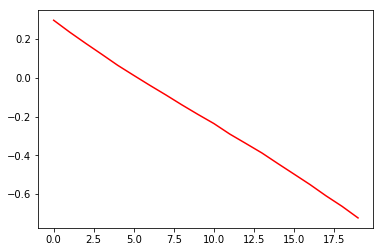

In [196]:
#Logistic Regression 
LR = LogisticRegression()
LR.fit(xtr_std, ytr)
result = LR.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print("logistic regression: %.4f" % (acc_rate))

#SVM
svm = SVC()
svm.fit(xtr_std, ytr)
result = svm.predict(xte_std)
acc_rate = accuracy_score(yte, result)
print("SVM: %.4f" % (acc_rate))

#Neural Network
hidden_units = 50
activation = 'relu'
l2 = 0.001
learning_rate = 0.001
epochs = 20
batch_size = 20

model = models.Sequential()
#hidden layer
model.add(layers.Dense(input_dim = 4, units = hidden_units, activation=activation))
#output layer
model.add(layers.Dense(input_dim = hidden_units, units = 1, activation='sigmoid'))
#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

import numpy as np
zn = np.sum(ytr == 0)
on = np.sum(ytr == 1)
tn = np.sum(ytr == 2)
print("zero's number:%d, one's number: %d, two's number: %d" % (zn, on, tn))
class_weight = {
    0: zn/(on + tn),
    1: on/(zn + tn), 
    2: tn/(on + zn)
}

# train
history = model.fit(xtr_std, ytr, epochs=epochs, batch_size=batch_size, class_weight=class_weight)
# evaluate accuracy
train_acc = model.evaluate(xtr_std, ytr, batch_size=32)[1]
test_acc = model.evaluate(xte_std, yte, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## 討論
* logistic regression： 84.2%
* SVM： 97.4%
* NN： 76.3%
* 在iris dataset中，logistic regression、SVM、NN預測準確率都大幅提高，說明此數據集的attribute有規律可尋且和結果（花的種類）相關性高
* SVM準確率最高，可見此dataset可以很好的話分成三個種類
